In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from zipfile import ZipFile
import cv2
import json

In [2]:
dataset_path = r'C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\dataset\PlantVillage'

In [3]:
!pip install split-folders

In [4]:
import splitfolders
splitfolders.ratio(dataset_path, output="output", seed=1337, ratio=(.8, .2))

Copying files: 20639 files [00:38, 538.17 files/s]


In [4]:
# Data generators
batch_size = 128
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    'output/train',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical'
)
val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    'output/val',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 16504 images belonging to 16 classes.
Found 4134 images belonging to 16 classes.


In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()


C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 198, 198, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 97, 97, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,664 (904.94 KB)

 Trainable params: 231,184 (903.06 KB)

 Non-trainable params: 480 (1.88 KB)

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])


In [8]:
# Training parameters
epochs = 10
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size


In [9]:
# Model checkpoint callback
checkpoint = ModelCheckpoint("model_best.keras", monitor='val_loss', verbose=1, save_best_only=True)



In [10]:
# Train the model
history = model.fit(
    x=train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint]
)


C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5467 - loss: 1.5209
Epoch 1: val_loss improved from inf to 4.59607, saving model to model_best.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.5478 - loss: 1.5168 - val_accuracy: 0.0955 - val_loss: 4.5961
Epoch 2/10
  1/128 ━━━━━━━━━━━━━━━━━━━━ 3:24 2s/step - accuracy: 0.7422 - loss: 0.7048

C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 4.59607 to 4.57531, saving model to model_best.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.7422 - loss: 0.7048 - val_accuracy: 0.0957 - val_loss: 4.5753
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8636 - loss: 0.4087
Epoch 3: val_loss did not improve from 4.57531
128/128 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8638 - loss: 0.4084 - val_accuracy: 0.1499 - val_loss: 6.2380
Epoch 4/10
  1/128 ━━━━━━━━━━━━━━━━━━━━ 2:44 1s/step - accuracy: 0.8917 - loss: 0.2839
Epoch 4: val_loss did not improve from 4.57531
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.8917 - loss: 0.2839 - val_accuracy: 0.1360 - val_loss: 6.3371
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9354 - loss: 0.2147
Epoch 5: val_loss did not improve from 4.57531
128/128 ━━━━━━━━━━━━━━━━━━━━ 608s 5s/step - accuracy: 0.9354 - loss: 0.2147 - val_accuracy: 0.2463 - val_loss: 5.2870
Epoch 6/10
  1/128 ━━━━━━━━━━━━━━━━━━━━ 2

In [11]:
# Save the final model
model.save("model.h5")
model.save("model.keras")

In [12]:
# Evaluate the model
model = tf.keras.models.load_model("model_best.keras")
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 378ms/step - accuracy: 0.8352 - loss: 0.5221
Validation Accuracy: 83.72%


In [13]:
# Testing single files/images
test_images_path = r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\output\val"  # Replace with the path to your test images folder
test_images = [f for f in os.listdir(test_images_path) if f.endswith(('png', 'jpg', 'jpeg'))]
dataset = np.ndarray(shape=(len(test_images), 200, 200, 3))

In [18]:
import os

test_images_path = r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\output\val"
print("Files in the folder:", os.listdir(test_images_path))

Files in the folder: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [19]:
import os
import cv2
import numpy as np

test_images_path = r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\output\val"  # Replace with your folder path

# List to hold images and their filenames
dataset = []
test_images = []

# Traverse through subfolders
for root, dirs, files in os.walk(test_images_path):
    for file in files:
        if file.endswith(('png', 'jpg', 'jpeg')):  # Check for valid image files
            file_path = os.path.join(root, file)
            img = cv2.imread(file_path)
            if img is not None:  # Ensure the image is loaded successfully
                img_resize = cv2.resize(img, (200, 200))  # Resize to match input shape
                dataset.append(np.array(img_resize) / 255.0)  # Normalize pixel values
                test_images.append(file)  # Save the filename for reference
            else:
                print(f"Warning: Skipping unreadable image {file}")

# Convert the dataset list to a NumPy array
dataset = np.array(dataset)

# Check if dataset is populated
if dataset.size == 0:
    raise ValueError("No valid images found in the test_images_path or its subfolders.")

print("Dataset shape:", dataset.shape)


Dataset shape: (24, 200, 200, 3)


In [24]:
dataset = np.ndarray(shape=(len(test_images), 200, 200, 3))



In [27]:
test_images = [f for f in os.listdir(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\output\val" )]
dataset = np.ndarray(shape=(len(test_images), 200, 200, 3))

import cv2

for i, file_name in enumerate(test_images):
  try:
    img=cv2.imread('/content/test_imgs/' + file_name)
    img_resize=cv2.resize(img,(200,200))
    dataset[i]=np.array(img_resize)/255.0
  except:
    print(file_name)
dataset.shape

Pepper__bell___Bacterial_spot
Pepper__bell___healthy
PlantVillage
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus


(16, 200, 200, 3)

In [30]:
# Extract class labels from the train_generator
classes_train = {v: k for k, v in train_generator.class_indices.items()}

# Predict probabilities for each class
predictions = model.predict(dataset)

# Get the index of the class with the highest probability
results = np.argmax(predictions, axis=1)

# Map results to class labels
final_json = {}
for file_name, result in zip(test_images, results):
    final_json[file_name] = classes_train[result]

# Save predictions to a JSON file
import json
with open('prediction.json', 'w') as outfile:
    json.dump(final_json, outfile)

print("Predictions saved to prediction.json")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predictions saved to prediction.json


In [35]:
import tensorflow as tf
model = tf.keras.models.load_model(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\model_best.keras")
## For TFLite model
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
open('model.tflite', 'wb').write(tflite_model)
## For TFLite optimized model
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_opt_model=converter.convert()
open('model_opt.tflite', 'wb').write(tflite_opt_model)


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp4zk1uipz\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp4zk1uipz\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmp4zk1uipz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2296853275344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853276496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853275152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  229685

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpx5uth3vc\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpx5uth3vc\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmpx5uth3vc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2296853275344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853276496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853275152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  229685

247600

In [36]:
# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp__z19n6i\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp__z19n6i\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmp__z19n6i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2296853275344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853276496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853275152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  229685

In [37]:
# Save optimized TensorFlow Lite model
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_opt_model = converter.convert()
with open('model_opt.tflite', 'wb') as f:
    f.write(tflite_opt_model)

print("Model saved as TFLite files.")

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp8i3_cmi6\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp8i3_cmi6\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmp8i3_cmi6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2296853275344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853276496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853275152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853277264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296853274000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  229685

Model saved as TFLite files.


In [38]:
from IPython.display import FileLink

# Provide the path to your files
file_paths = ['model.h5', 'model.tflite', 'model_opt.tflite']

# Create download links for the files
for file_path in file_paths:
    display(FileLink(file_path))


C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\model.h5

C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\model.tflite

C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\model_opt.tflite

In [42]:
print(model.input_shape)


(None, 200, 200, 3)


In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import json

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\model_best.keras")

# Set image size to match model input shape
img_width, img_height = 200, 200  # Change to 200x200 as expected by the model

# Extract class labels from the train_generator (assuming you have this available)
# You can use this mapping to translate the predicted index to class name
classes_train = {v: k for k, v in train_generator.class_indices.items()}

# Function to predict the disease from an image
def predict_disease(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_width, img_height))  # Resize to (200, 200)
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match model input

    # Normalize the image
    img_array = img_array / 255.0

    # Predict the class probabilities
    predictions = model.predict(img_array)

    # Get the index of the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map the index to the class name using the class mapping
    predicted_class_name = classes_train[predicted_class]

    # Return the prediction
    return predicted_class_name


img_path = r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\tomatospot.png" # Replace with the path to the image you want to predict
predicted_disease = predict_disease(img_path)
print(f"The predicted disease is: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
The predicted disease is: Tomato_Septoria_leaf_spot


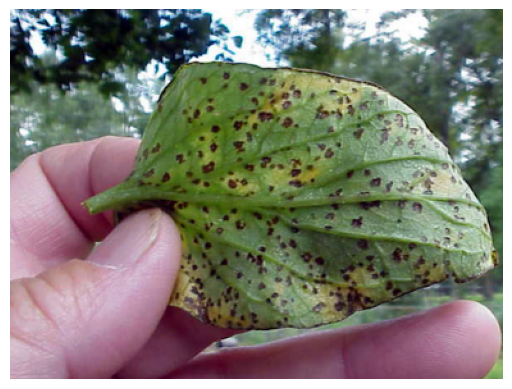

In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to show the image
def show_image(img_path):
    # Load the image
    img = image.load_img(img_path)
    
    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()


img_path =  r"C:\Users\user\Desktop\Edgematrix\DeepLearning\plant disease\tomatospot.png" # Replace with your image path
show_image(img_path)


In [55]:
# Get the class indices from the train_generator
class_indices = train_generator.class_indices

# Find the number of classes
num_classes = len(class_indices)

# Display the class names
class_names = list(class_indices.keys())

# Print the number of classes and their names
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)


Number of classes: 16
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


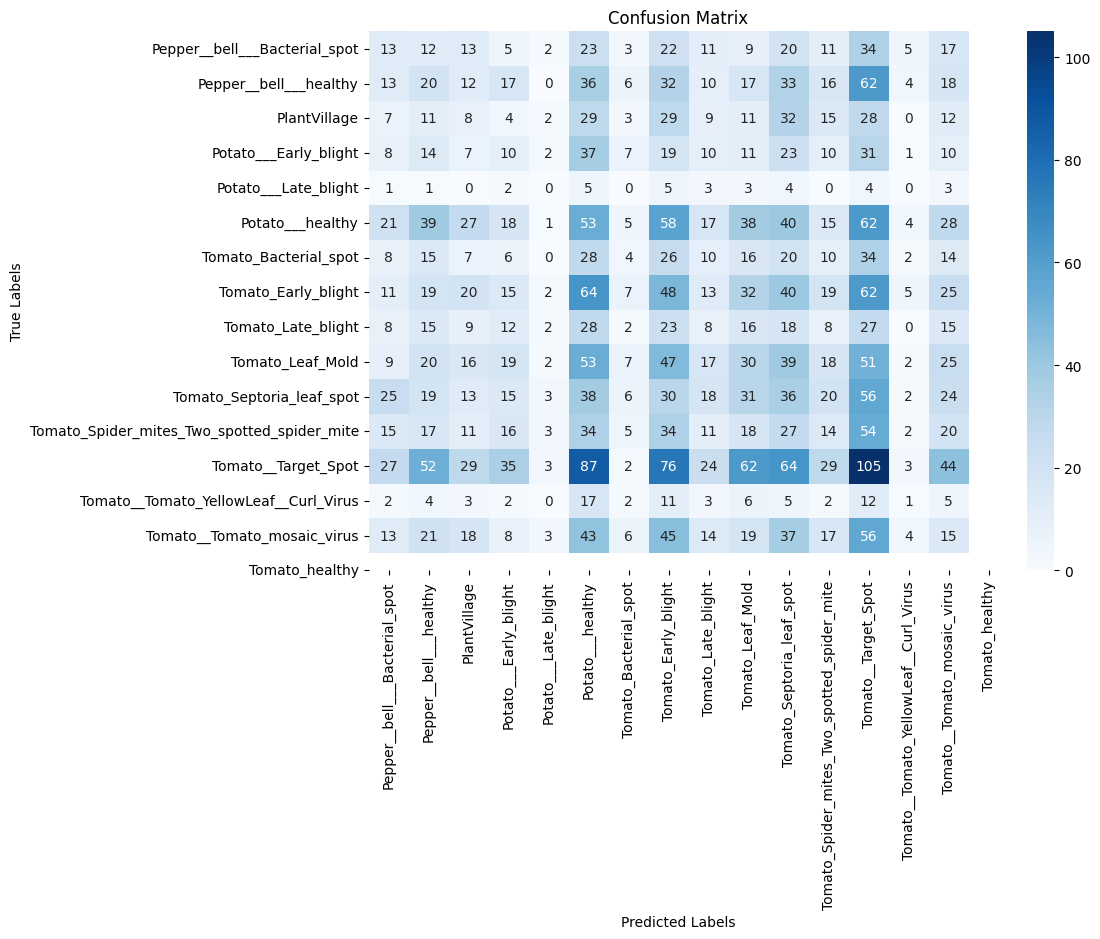

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    """
    Plots a confusion matrix using Seaborn heatmap.
    
    Parameters:
    - true_labels: True class labels.
    - predicted_labels: Predicted class labels.
    - class_names: List of class names.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Extract true labels and predicted labels
true_labels = val_generator.classes
predicted_probs = model.predict(val_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Plot confusion matrix
class_names = list(train_generator.class_indices.keys())
plot_confusion_matrix(true_labels, predicted_labels, class_names)


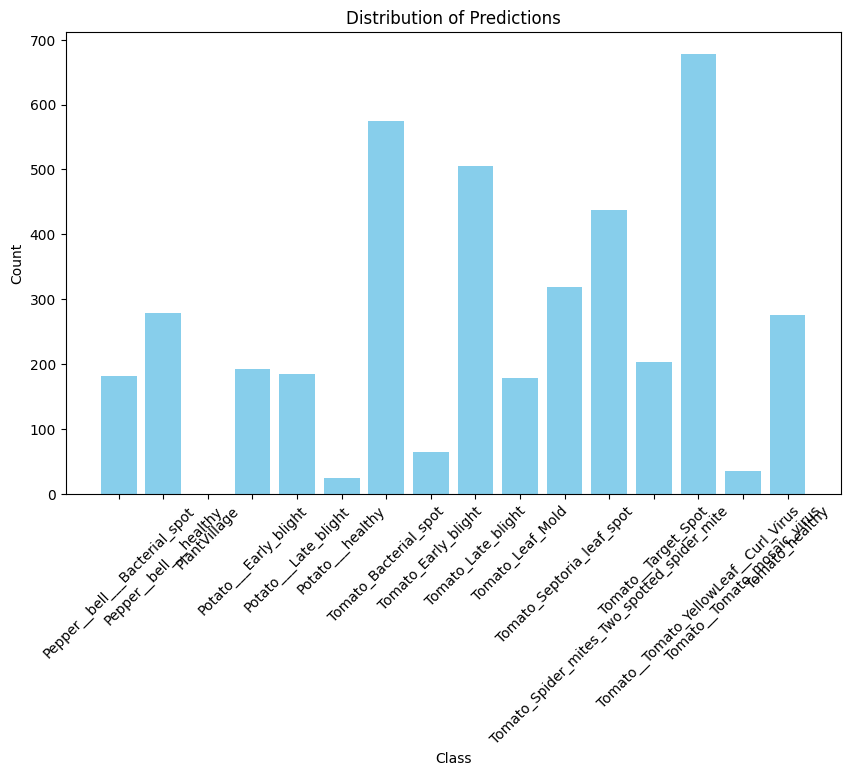

In [10]:
def plot_prediction_distribution(predicted_probs, class_names):
    """
    Plots a bar chart showing the distribution of predictions across classes.
    
    Parameters:
    - predicted_probs: Predicted probabilities for each class.
    - class_names: List of class names.
    """
    predictions = np.argmax(predicted_probs, axis=1)
    counts = np.bincount(predictions, minlength=len(class_names))

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Distribution of Predictions')
    plt.xticks(rotation=45)
    plt.show()

# Call the function
plot_prediction_distribution(predicted_probs, class_names)
